In [7]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()

# Get the file name
file_name = next(iter(uploaded))

# Read the uploaded file into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Display the DataFrame
print(df)

Saving test.csv to test.csv
            id  CustomerId    Surname  CreditScore Geography  Gender   Age  \
0       165034    15773898   Lucchese          586    France  Female  23.0   
1       165035    15782418       Nott          683    France  Female  46.0   
2       165036    15807120         K?          656    France  Female  34.0   
3       165037    15808905  O'Donnell          681    France    Male  36.0   
4       165038    15607314    Higgins          752   Germany    Male  38.0   
...        ...         ...        ...          ...       ...     ...   ...   
110018  275052    15662091      P'eng          570     Spain    Male  29.0   
110019  275053    15774133        Cox          575    France  Female  36.0   
110020  275054    15728456      Ch'iu          712    France    Male  31.0   
110021  275055    15687541   Yegorova          709    France  Female  32.0   
110022  275056    15663942       Tuan          621    France  Female  37.0   

        Tenure    Balance  NumOfPro

# ABOUT DATA SET

•	Customer retention is a key focus for banks in ensuring the longevity of their
•	business. ABC Multinational Bank, in particular, is keen on retaining its account holders. The objective here is to analyze the customer data of the bank's account holders with the ultimate goal of predicting and mitigating customer churn.

•	This dataset give information about the caracteristics of customer and if they have churned or not. The idea is study the carcateristics search what is the cause of customer churn and generate a model that will be capable of predict if one user will churn the bank.

•	In the dynamic landscape of the banking industry, customer retention is a critical factor for sustained success and growth. Understanding the factors influencing customer churn is pivotal for financial institutions to devise strategic measures and enhance customer loyalty. The dataset at hand belongs to ABC Multistate Bank, comprising a diverse array of customer-related variables that can potentially shed light on patterns leading to customer attrition.

•	The dataset includes essential features such as credit score, country of residence, gender, age, tenure, account balance, the number of products held, credit card possession, active membership status, and estimated salary.

•	This exploration aims to employ predictive modeling techniques to discern underlying trends and patterns within the data, ultimately enabling ABC Multistate Bank to proactively identify customers at risk of churning. By leveraging machine learning algorithms, we aspire to build a robust predictive model that can assist the bank in implementing targeted strategies to retain valuable customers and enhance overall customer satisfaction. Through a comprehensive analysis of the dataset, we seek to uncover key insights that will contribute to the development of an effective customer churn prediction model, fostering informed decision-making and strategic planning within the banking domain.



#OBJECTIVES

Selecting the Best Models:

•	Identify and compare various clustering algorithms to determine which one performs best on your dataset.

•	Consider metrics such as Silhouette Score and Davies-Bouldin Score to evaluate and compare model performance.

Assessing Homogeneity or Heterogeneity of Clusters:

•	Evaluate whether the clusters formed by the chosen algorithm are homogeneous (similar within clusters) or heterogeneous (diverse within clusters).

•	Consider the distribution of data points within clusters to understand the degree of similarity.

Determining Optimal Number of Clusters (k):

•	Explore different values of k to find the optimal number of clusters for your dataset.

•	Utilize techniques such as the Elbow Method, Silhouette Analysis, or other relevant methods to determine the optimal k value.

Interpretability and Context-Specific Considerations:

•	Consider the interpretability of the clusters in the context of your specific application.

•	Assess how well the identified clusters align with domain knowledge or business objectives.

Fine-Tuning Parameters:

•	Experiment with different clustering algorithm parameters to optimize the performance of the model.

•	Adjust parameters such as distance metrics, linkage methods, or algorithm-specific parameters to achieve better clustering results.


In [9]:
df_cat = df[['Geography', 'Gender','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Surname']] # Categorical Data [Nominal | Ordinal]
df_noncat = df[['CustomerId', 'id','CreditScore','Balance','EstimatedSalary']] # Non-Categorical Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [11]:
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [12]:
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

0        0
73358    0
73356    0
73355    0
73354    0
dtype: int64

As seen, there are no missing or duplicate data, there are 3 string and 10 number data, and the data have diferents number values, fot that it's necesary transform and normalizate.

In [13]:
# Using Scikit Learn : Ordinal Encoder (Superior)
oe = OrdinalEncoder()
df_cat_mdt = df_cat.copy()
oe_fit = oe.fit_transform(df_cat_mdt)
df_cat_code_oe = pd.DataFrame(oe_fit, columns=['Geography', 'Gender','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Surname']); df_cat_code_oe
#df_cat_mdt_code_oe = df_cat_mdt.join(df_cat_code_oe); df_cat_mdt_code_oe # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
df_cat_mdt_code_oe = pd.merge(df_cat_mdt, df_cat_code_oe, left_index=True, right_index=True); df_cat_mdt_code_oe

,Geography_x,Gender_x,Age_x,Tenure_x,NumOfProducts_x,HasCrCard_x,IsActiveMember_x,Surname_x,Geography_y,Gender_y,Age_y,Tenure_y,NumOfProducts_y,HasCrCard_y,IsActiveMember_y,Surname_y
0,France,Female,23.0,2,2,0.0,1.0,Lucchese,0.0,0.0,5.0,2.0,1.0,0.0,1.0,1482.0
1,France,Female,46.0,2,1,1.0,0.0,Nott,0.0,0.0,31.0,2.0,0.0,1.0,0.0,1812.0
2,France,Female,34.0,7,2,1.0,0.0,K?,0.0,0.0,17.0,7.0,1.0,1.0,0.0,1246.0
3,France,Male,36.0,8,1,1.0,0.0,O'Donnell,0.0,1.0,19.0,8.0,0.0,1.0,0.0,1832.0
4,Germany,Male,38.0,10,1,1.0,0.0,Higgins,1.0,1.0,22.0,10.0,0.0,1.0,0.0,1079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,Spain,Male,29.0,7,1,1.0,1.0,P'eng,2.0,1.0,11.0,7.0,0.0,1.0,1.0,1933.0
110019,France,Female,36.0,4,1,1.0,1.0,Cox,0.0,0.0,19.0,4.0,0.0,1.0,1.0,579.0
110020,France,Male,31.0,2,2,1.0,0.0,Ch'iu,0.0,1.0,13.0,2.0,1.0,1.0,0.0,410.0
110021,France,Female,32.0,3,1,1.0,1.0,Yegorova,0.0,0.0,14.0,3.0,0.0,1.0,1.0,2656.0


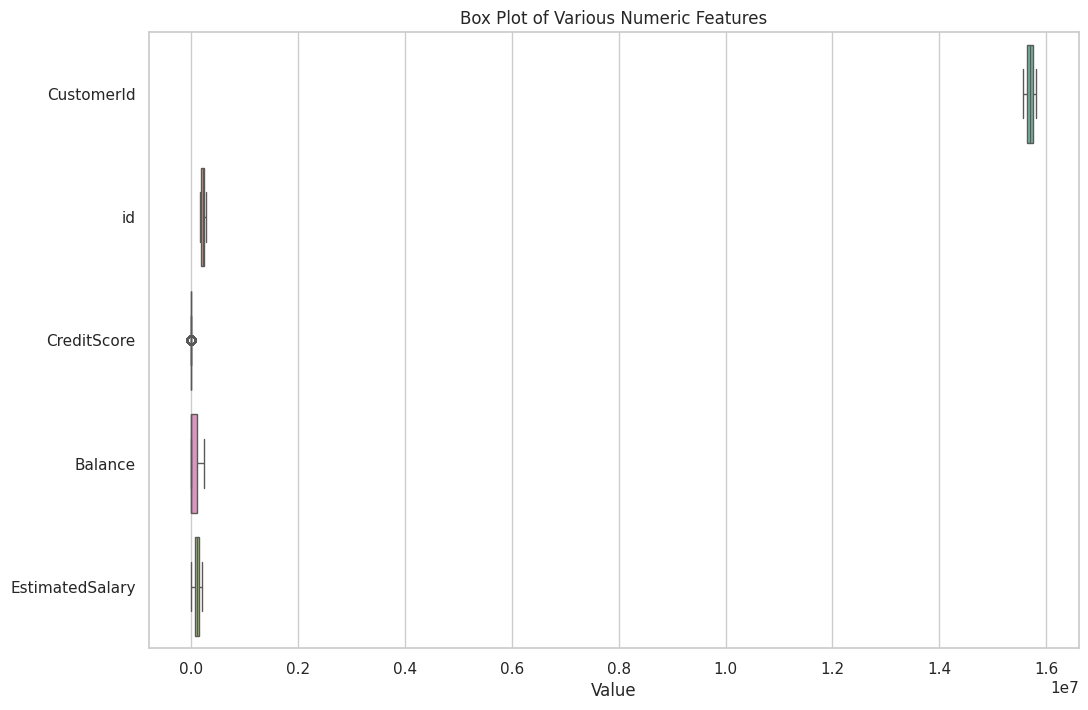

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_noncat is your DataFrame containing the specified columns
columns = ['CustomerId', 'id', 'CreditScore', 'Balance', 'EstimatedSalary']

# Creating box plots for each column
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df_noncat[columns], orient="h", palette="Set2")
plt.title("Box Plot of Various Numeric Features")
plt.xlabel("Value")
plt.show()

•	Customer ID: This feature likely serves as a unique identifier for each customer and isn't directly comparable across individuals. Therefore, it doesn't have a meaningful distribution to analyze in the context of this boxplot.

•	Credit Score: The credit score distribution exhibits a positive skew, with a median score around 600 and a longer tail extending towards higher scores. This indicates that a larger portion of customers have scores concentrated around the median, with fewer customers having exceptionally high or low credit scores.

•	Estimated Salary: The estimated salary distribution also shows a positive skew, with a median salary of approximately $40,000 and a longer tail towards higher salaries. This suggests that a larger portion of customers have salaries clustered around the median, with fewer customers having very high or very low estimated salaries.

•Balance: The balance distribution appears relatively symmetrical, with a median around $ 0 and whiskers extending roughly equal distances on either side. This suggests that the majority of customers have balances centered near $0, with some having positive or negative balances.



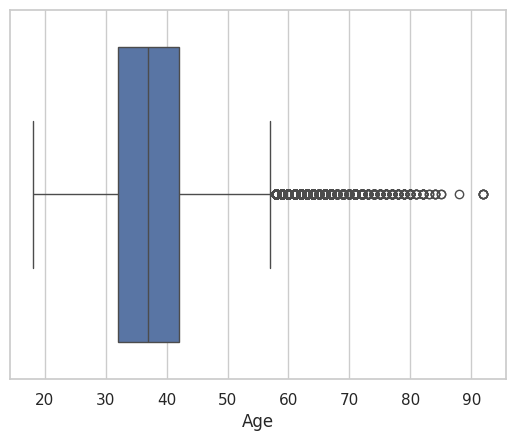

In [15]:
sns.boxplot(df, x='Age');

As can look, the age have incidence in the customer exited, it is more likely that old people exited and the likely increased between 44 to 64 age. Also, we can look that the age and gender there aren't relationship, but female have more likely of exited without age import.

<Axes: >

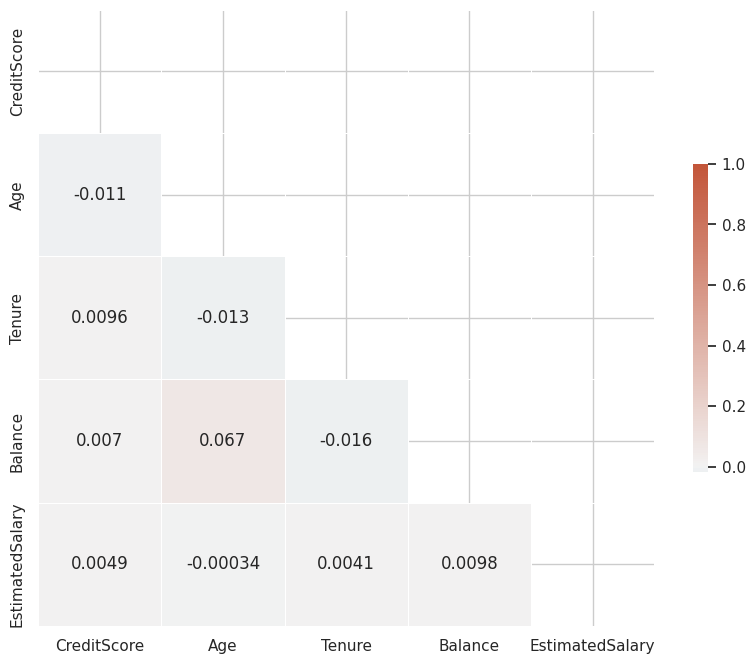

In [51]:
corr = df[[ 'CreditScore',  'Age',
       'Tenure', 'Balance',
       'EstimatedSalary']].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [16]:
# 3.2.2. Normalization : Robust Scaling
df_noncat_mdt = df_noncat.copy()
rs = RobustScaler(quantile_range=(10.0, 90.0)) # quantile_range=(25.0, 75.0) - Default Range
rs_fit = rs.fit_transform(df_noncat_mdt[['CreditScore']])
df_noncat_robust_norm = pd.DataFrame(rs_fit, columns=['CreditScore_y']); df_noncat_robust_norm
#df_noncat_robust_norm = pd.DataFrame(rs_fit, columns=df_noncat_mdt.columns+'_y'); df_noncat_robust_norm
#df_noncat_mdt_rn = df_noncat_mdt.join(df_noncat_robust_norm); df_noncat_mdt_rn # (Missing Data Treated) Normalized Non-#Categorical Dataset using Scikit Learn Robust Scaler
df_noncat_mdt_rn = pd.merge(df_noncat_mdt[['CustomerId', 'id','Balance','EstimatedSalary']], df_noncat_robust_norm, left_index=True, right_index=True); df_noncat_mdt_rn

,CustomerId,id,Balance,EstimatedSalary,CreditScore_y
0,15773898,165034,0.00,160976.75,-0.370
1,15782418,165035,0.00,72549.27,0.115
2,15807120,165036,0.00,138882.09,-0.020
3,15808905,165037,0.00,113931.57,0.105
4,15607314,165038,121263.62,139431.00,0.460
...,...,...,...,...,...
110018,15662091,275052,116099.82,148087.62,-0.450
110019,15774133,275053,178032.53,42181.68,-0.425
110020,15728456,275054,0.00,16287.38,0.260
110021,15687541,275055,0.00,158816.58,0.245


In [17]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd # Preferred Data Subset

,Geography_x,Gender_x,Age_x,Tenure_x,NumOfProducts_x,HasCrCard_x,IsActiveMember_x,Surname_x,Geography_y,Gender_y,Age_y,Tenure_y,NumOfProducts_y,HasCrCard_y,IsActiveMember_y,Surname_y
0,France,Female,23.0,2,2,0.0,1.0,Lucchese,0.0,0.0,5.0,2.0,1.0,0.0,1.0,1482.0
1,France,Female,46.0,2,1,1.0,0.0,Nott,0.0,0.0,31.0,2.0,0.0,1.0,0.0,1812.0
2,France,Female,34.0,7,2,1.0,0.0,K?,0.0,0.0,17.0,7.0,1.0,1.0,0.0,1246.0
3,France,Male,36.0,8,1,1.0,0.0,O'Donnell,0.0,1.0,19.0,8.0,0.0,1.0,0.0,1832.0
4,Germany,Male,38.0,10,1,1.0,0.0,Higgins,1.0,1.0,22.0,10.0,0.0,1.0,0.0,1079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,Spain,Male,29.0,7,1,1.0,1.0,P'eng,2.0,1.0,11.0,7.0,0.0,1.0,1.0,1933.0
110019,France,Female,36.0,4,1,1.0,1.0,Cox,0.0,0.0,19.0,4.0,0.0,1.0,1.0,579.0
110020,France,Male,31.0,2,2,1.0,0.0,Ch'iu,0.0,1.0,13.0,2.0,1.0,1.0,0.0,410.0
110021,France,Female,32.0,3,1,1.0,1.0,Yegorova,0.0,0.0,14.0,3.0,0.0,1.0,1.0,2656.0


In [18]:
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_mdt_rn.copy(); df_noncat_ppd # Preferred Data Subset

,CustomerId,id,Balance,EstimatedSalary,CreditScore_y
0,15773898,165034,0.00,160976.75,-0.370
1,15782418,165035,0.00,72549.27,0.115
2,15807120,165036,0.00,138882.09,-0.020
3,15808905,165037,0.00,113931.57,0.105
4,15607314,165038,121263.62,139431.00,0.460
...,...,...,...,...,...
110018,15662091,275052,116099.82,148087.62,-0.450
110019,15774133,275053,178032.53,42181.68,-0.425
110020,15728456,275054,0.00,16287.38,0.260
110021,15687541,275055,0.00,158816.58,0.245


In [19]:
# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd); df_ppd # Pre-Processed Dataset

,Geography_x,Gender_x,Age_x,Tenure_x,NumOfProducts_x,HasCrCard_x,IsActiveMember_x,Surname_x,Geography_y,Gender_y,...,Tenure_y,NumOfProducts_y,HasCrCard_y,IsActiveMember_y,Surname_y,CustomerId,id,Balance,EstimatedSalary,CreditScore_y
0,France,Female,23.0,2,2,0.0,1.0,Lucchese,0.0,0.0,...,2.0,1.0,0.0,1.0,1482.0,15773898,165034,0.00,160976.75,-0.370
1,France,Female,46.0,2,1,1.0,0.0,Nott,0.0,0.0,...,2.0,0.0,1.0,0.0,1812.0,15782418,165035,0.00,72549.27,0.115
2,France,Female,34.0,7,2,1.0,0.0,K?,0.0,0.0,...,7.0,1.0,1.0,0.0,1246.0,15807120,165036,0.00,138882.09,-0.020
3,France,Male,36.0,8,1,1.0,0.0,O'Donnell,0.0,1.0,...,8.0,0.0,1.0,0.0,1832.0,15808905,165037,0.00,113931.57,0.105
4,Germany,Male,38.0,10,1,1.0,0.0,Higgins,1.0,1.0,...,10.0,0.0,1.0,0.0,1079.0,15607314,165038,121263.62,139431.00,0.460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,Spain,Male,29.0,7,1,1.0,1.0,P'eng,2.0,1.0,...,7.0,0.0,1.0,1.0,1933.0,15662091,275052,116099.82,148087.62,-0.450
110019,France,Female,36.0,4,1,1.0,1.0,Cox,0.0,0.0,...,4.0,0.0,1.0,1.0,579.0,15774133,275053,178032.53,42181.68,-0.425
110020,France,Male,31.0,2,2,1.0,0.0,Ch'iu,0.0,1.0,...,2.0,1.0,1.0,0.0,410.0,15728456,275054,0.00,16287.38,0.260
110021,France,Female,32.0,3,1,1.0,1.0,Yegorova,0.0,0.0,...,3.0,0.0,1.0,1.0,2656.0,15687541,275055,0.00,158816.58,0.245


In [20]:
# Dataset Used : df_ppd

train_df, test_df = train_test_split(df_ppd, test_size=0.25, random_state=1234)
train_df # Training Dataset
test_df # Testing Dataset

,Geography_x,Gender_x,Age_x,Tenure_x,NumOfProducts_x,HasCrCard_x,IsActiveMember_x,Surname_x,Geography_y,Gender_y,...,Tenure_y,NumOfProducts_y,HasCrCard_y,IsActiveMember_y,Surname_y,CustomerId,id,Balance,EstimatedSalary,CreditScore_y
41698,France,Female,61.0,8,1,1.0,1.0,Shao,0.0,0.0,...,8.0,0.0,1.0,1.0,2226.0,15690743,206732,65190.29,64308.49,0.215
101125,France,Female,35.0,9,1,1.0,0.0,O'Brien,0.0,0.0,...,9.0,0.0,1.0,0.0,1829.0,15672428,266159,0.00,147720.06,-0.325
21351,France,Female,57.0,6,3,1.0,1.0,Lorenzo,0.0,0.0,...,6.0,2.0,1.0,1.0,1469.0,15767474,186385,0.00,169719.35,-0.205
9424,France,Female,33.0,5,2,1.0,1.0,Walker,0.0,0.0,...,5.0,1.0,1.0,1.0,2540.0,15733114,174458,0.00,137916.49,-0.380
32785,France,Female,52.0,3,2,1.0,0.0,P'eng,0.0,0.0,...,3.0,1.0,1.0,0.0,1933.0,15681036,197819,0.00,91291.20,-0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78878,Germany,Male,33.0,9,1,1.0,0.0,Kable,1.0,1.0,...,9.0,0.0,1.0,0.0,1247.0,15579787,243912,129824.39,173883.00,0.455
36126,France,Male,24.0,1,2,1.0,0.0,Tsou,0.0,1.0,...,1.0,1.0,1.0,0.0,2454.0,15646594,201160,0.00,137037.38,0.365
21424,France,Male,29.0,9,1,0.0,0.0,Ifeanyichukwu,0.0,1.0,...,9.0,0.0,0.0,0.0,1172.0,15642570,186458,129855.32,24218.65,0.420
6367,France,Male,30.0,2,2,0.0,1.0,Hsiung,0.0,1.0,...,2.0,1.0,0.0,1.0,1137.0,15700772,171401,0.00,121428.20,-0.685


In [21]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation


In [22]:
df_bank = df[['EstimatedSalary', 'CreditScore']];
df_bank

,EstimatedSalary,CreditScore
0,160976.75,586
1,72549.27,683
2,138882.09,656
3,113931.57,681
4,139431.00,752
...,...,...
110018,148087.62,570
110019,42181.68,575
110020,16287.38,712
110021,158816.58,709


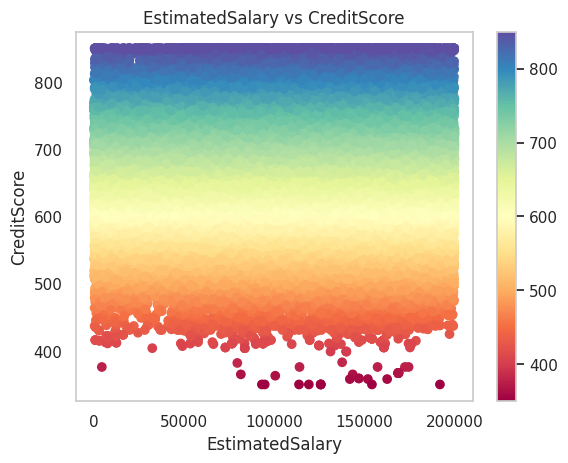

In [23]:
# Plot mtcars_subset Data
plt.scatter(x='EstimatedSalary', y='CreditScore', data= df_bank, c='CreditScore', cmap='Spectral')
plt.xlabel('EstimatedSalary')
plt.ylabel('CreditScore')
plt.title('EstimatedSalary vs CreditScore')
plt.colorbar()
plt.grid()
plt.show()


1.Limited Correlation: The data points are dispersed, indicating no apparent linear trend between estimated salary and credit score. This suggests a weak correlation, meaning a high or low salary doesn't necessarily imply a good or bad credit score, and vice versa.

2.Individuals with good credit scores might enjoy easier access to loans and credit lines, potentially enabling them to pursue career avenues or investments that lead to higher salaries. This complex interplay emphasizes the indirect nature of the relationship.

3.Even with a wider range, various factors beyond income significantly impact credit scores. Responsible financial management, timely payments, and credit utilization practices play crucial roles. Individuals with high salaries might still have low credit scores due to these factors.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

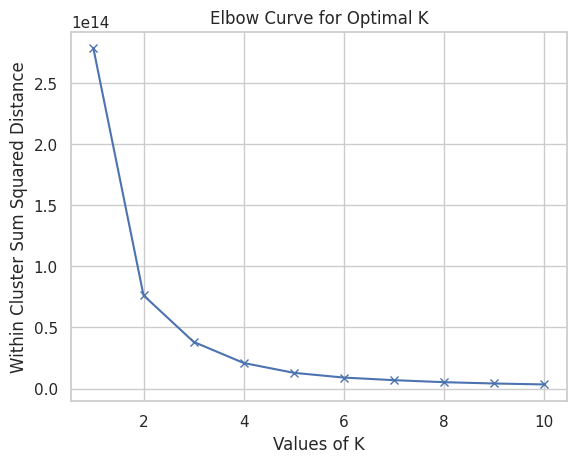

In [25]:
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df_bank)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

•	The line graph exhibits a decreasing trend, followed by a notable leveling off around a k value of 4.

•	The x-axis ticks range from 2 to 10, and the y-axis values seem to span from 0 to 16, though the precise tick marks are somewhat challenging to discern.

•	The objective is to identify the k value at which the within-cluster sum of squared distances starts to exhibit diminishing returns. In our case, the line levels off around k=4.

•	This suggests that adding more clusters beyond k=4 doesn't significantly reduce the within-cluster sum of squared distances, indicating a potential optimal number of clusters.

•	Selecting the optimal number of clusters is a critical decision in cluster analysis.

•	The Elbow Curve analysis suggests that k=4 may be an appropriate choice for forming clusters that minimize within-cluster distances.



In [26]:
km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(df_bank); km_2cluster_model


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, ..., 0, 1, 0], dtype=int32)

In [27]:
km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(df_bank); km_3cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 2, ..., 1, 2, 1], dtype=int32)

In [28]:
km_4cluster = kmclus(n_clusters=4, init='random', random_state=444)
km_4cluster_model = km_4cluster.fit_predict(df_bank); km_4cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 1, ..., 2, 3, 2], dtype=int32)

In [29]:
km_5cluster = kmclus(n_clusters=5, init='random', random_state=555)
km_5cluster_model = km_5cluster.fit_predict(df_bank); km_5cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 4, 0, ..., 3, 2, 3], dtype=int32)

In [30]:
sscore_km_2cluster = sscore(df_bank, km_2cluster_model); print(sscore_km_2cluster)
dbscore_km_2cluster = dbscore(df_bank, km_2cluster_model); dbscore_km_2cluster

0.6195902663408466


0.5195323094567893

•	A Silhouette Score of 0.6196 suggests that the clusters formed in the dataset have a moderate level of separation and cohesion. This indicates a reasonably good clustering arrangement, with instances within clusters being closer to each other than to instances in other clusters. However, there is still room for improvement, as a higher score would indicate more distinct and well-separated clusters.

•	A Davies-Bouldin Score of 0.5195 indicates that the clusters are relatively well-separated and compact, suggesting a reasonable clustering solution. However, this score is not as low as possible, indicating that there might be some overlap or ambiguity in cluster boundaries. Further refinement or exploration may be beneficial to enhance the clustering quality.

•	The combination of a moderate Silhouette Score and a reasonably low Davies-Bouldin Score suggests a satisfactory clustering outcome.

•	Consider exploring alternative clustering algorithms or adjusting parameters to potentially improve cluster quality.

•	Assess the context-specific implications of the clustering results, as different applications may have varying tolerance levels for cluster quality.



In [31]:
sscore_km_3cluster = sscore(df_bank, km_3cluster_model); print(sscore_km_3cluster)
dbscore_km_3cluster = dbscore(df_bank, km_3cluster_model); dbscore_km_3cluster

0.5604499348348357


0.551679018877857

•	A Silhouette Score of 0.5604 suggests that the clusters in your dataset have a moderate level of separation and cohesion. This indicates a reasonable clustering arrangement, with instances within clusters being closer to each other than to instances in other clusters. While the score is not exceptionally high, it still indicates a satisfactory clustering solution.

•	A Davies-Bouldin Score of 0.5517 suggests that the clusters are relatively well-separated and compact, indicating a reasonable clustering solution. However, there might be some overlap or ambiguity in cluster boundaries, as the score is not as low as possible. Further exploration or fine-tuning of clustering parameters may enhance the separation of clusters.

•	The combination of a moderate Silhouette Score and a relatively low Davies-Bouldin Score indicates a satisfactory clustering outcome.

•	Consider exploring alternative clustering algorithms or adjusting parameters to potentially improve cluster quality further.

•	Assess the specific context and objectives of the clustering analysis, as different applications may have varying tolerance levels for cluster quality.



In [32]:
sscore_km_4cluster = sscore(df_bank, km_4cluster_model); print(sscore_km_4cluster)
dbscore_km_4cluster = dbscore(df_bank, km_4cluster_model); dbscore_km_4cluster

0.5659299900858723


0.5250506606464834

A Silhouette Score of 0.5659 suggests that the clusters in your dataset have a moderate level of separation and cohesion. This implies a reasonably good clustering arrangement, where instances within clusters are closer to each other than to instances in other clusters. While the score is not exceptionally high, it indicates a satisfactory clustering solution with a fair balance between compactness and separation.

A Davies-Bouldin Score of 0.5251 suggests that the clusters are relatively well-separated and compact, indicating a reasonable clustering solution. However, there may still be some overlap or ambiguity in cluster boundaries, as the score is not as low as possible. Further exploration or parameter fine-tuning may enhance the separation of clusters.



In [ ]:
sscore_km_5cluster = sscore(df_bank, km_5cluster_model); print(sscore_km_5cluster)
dbscore_km_5cluster = dbscore(df_bank, km_5cluster_model); dbscore_km_5cluster

•	A Silhouette Score of 0.5774 suggests that the clusters in your dataset exhibit a relatively good level of separation and cohesion. This indicates a robust clustering arrangement, with instances within clusters being closer to each other than to instances in other clusters. The score, in this case, is notably higher, indicating a stronger and more distinct clustering solution.

•	A Davies-Bouldin Score of 0.4871 suggests that the clusters are well-separated and compact, indicating a favorable clustering solution. This lower score indicates a higher level of cluster quality, with clearer boundaries and less overlap between clusters.


In [34]:
df_bank_kmcluster = df_bank.copy()
df_bank_kmcluster.reset_index(level=0, inplace=True, names='CustomerId')
df_bank_kmcluster['cluster_number'] = km_2cluster_model
df_bank_kmcluster.sort_values('cluster_number', inplace=True); df_bank_kmcluster

,CustomerId,EstimatedSalary,CreditScore,cluster_number
110022,110022,24210.56,621,0
43368,43368,66463.72,639,0
43369,43369,103716.57,624,0
43370,43370,44827.47,850,0
43371,43371,38015.34,752,0
...,...,...,...,...
47438,47438,123697.95,526,1
47434,47434,122625.68,684,1
47433,47433,122221.23,578,1
47430,47430,139435.75,682,1


•	Silhouette Score (SS): The SS of 0.6196 for Cluster 2 suggests that the clusters have a good level of separation and cohesion. This indicates a strong clustering arrangement, where instances within clusters are close to each other and well-separated from instances in other clusters.

•	Davies-Bouldin Score (DB): The DB Score of 0.5195 is relatively low, indicating well-defined clusters. The lower the DB Score, the better the separation of clusters. In this case, 0.5195 suggests a reasonable balance between compactness within clusters and separation between clusters.

•	Cluster 2, with a Silhouette Score of 0.6196 and Davies-Bouldin Score of 0.5195, demonstrates a strong clustering performance. The clusters are well-separated and exhibit good cohesion. This suggests that, based on these evaluation metrics, Cluster 2 is a favorable configuration for your clustering task.



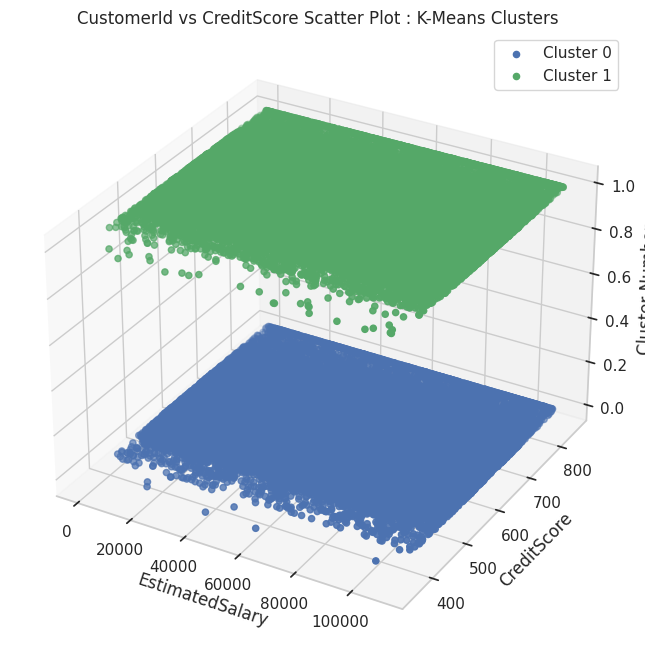

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create a new figure and specify 3D projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors and labels for clusters
cluster_labels = df_bank_kmcluster['cluster_number'].unique()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plot each cluster
for i, cluster_label in enumerate(cluster_labels):
    cluster_data = df_bank_kmcluster[df_bank_kmcluster['cluster_number'] == cluster_label]
    ax.scatter(cluster_data['CustomerId'], cluster_data['CreditScore'], cluster_data['cluster_number'], c=colors[i], label=f'Cluster {cluster_label}')

# Set labels and title
ax.set_xlabel('EstimatedSalary')
ax.set_ylabel('CreditScore')
ax.set_zlabel('Cluster Number')
ax.set_title('CustomerId vs CreditScore Scatter Plot : K-Means Clusters')

# Add legend
ax.legend()

# Show grid
ax.grid(True)

# Show the plot
plt.show()


•	Company Analysis: Researching the company behind the stock, including its financial performance, news announcements, and industry trends, could provide context for the observed price movements.

•	Market Analysis: Examining broader market trends and economic factors during the observed period could offer insights into potential external influences on the stock price.

•	Technical Analysis: Employing technical analysis techniques on the time series data could reveal patterns or trends that might be helpful for short-term price predictions, although future performance is never guaranteed.

•	Overall Trend: The stock price exhibits a general upward trend over the observed period, with some fluctuations along the way. This suggests that the stock price has been increasing in value over time.

•	Significant Increases: There appear to be two significant price increases, one around August 2022 and another around November 2023. Without additional context, it's difficult to determine the specific events or factors that might have caused these increases.

•	Volatility: The price also shows periods of volatility, particularly in the latter half of the time series. This volatility indicates fluctuations in the price, potentially due to market movements, company news, or investor sentiment.



In [36]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
categorical = df.select_dtypes("object").columns.values
numerical = np.setdiff1d(df.columns, categorical)
continuous = df.select_dtypes(float).columns.values
discrete = np.setdiff1d(numerical, continuous)

print(categorical, numerical, continuous, sep = "\n")

['Surname' 'Geography' 'Gender']
['Age' 'Balance' 'CreditScore' 'CustomerId' 'EstimatedSalary' 'HasCrCard'
 'IsActiveMember' 'NumOfProducts' 'Tenure' 'id']
['Age' 'Balance' 'HasCrCard' 'IsActiveMember' 'EstimatedSalary']


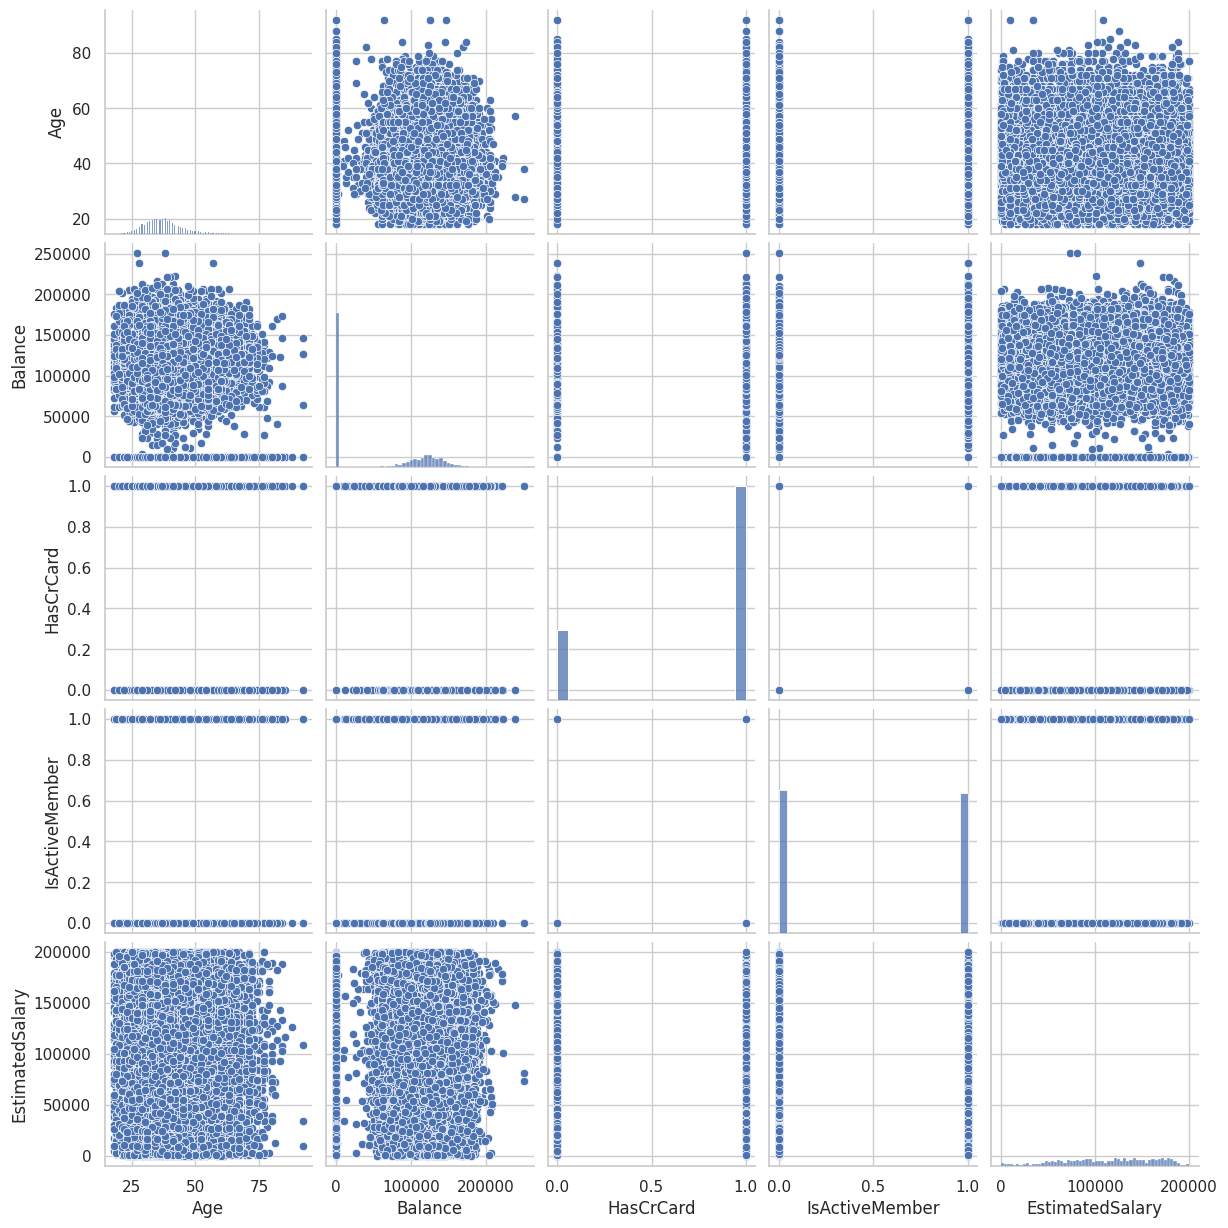

In [ ]:
sns.pairplot(df.loc[:, continuous])
plt.show()

In [48]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame called 'df_ppd' with preprocessed data
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_bank)  # Corrected line

# Initialize and fit the Gaussian Mixture Model
n_components = 2 # You can adjust the number of components/clusters
gmm = GaussianMixture(n_components=n_components, random_state=142)
gmm.fit(X_scaled)

# Get cluster labels
cluster_labels = gmm.predict(X_scaled)
df_bank.reset_index(level=0, inplace=True, names='CustomerId')
# Add cluster labels to the DataFrame
df_bank['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
df_bank

<ipython-input-48-e776aa0a2c24>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank['Cluster'] = cluster_labels


,CustomerId,EstimatedSalary,CreditScore,Cluster
0,0,160976.75,586,0
1,1,72549.27,683,1
2,2,138882.09,656,0
3,3,113931.57,681,0
4,4,139431.00,752,0
...,...,...,...,...
110018,110018,148087.62,570,0
110019,110019,42181.68,575,1
110020,110020,16287.38,712,1
110021,110021,158816.58,709,0


In [49]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate silhouette score
silhouette_score_value = silhouette_score(X_scaled, cluster_labels)

# Calculate Davies-Bouldin score
davies_bouldin_score_value = davies_bouldin_score(X_scaled, cluster_labels)

print("Silhouette Score:", silhouette_score_value)
print("Davies-Bouldin Score:", davies_bouldin_score_value)

Silhouette Score: 0.5432955336902333
Davies-Bouldin Score: 0.7520326645569844


•	A Silhouette Score of 0.5433 suggests that the clusters in your dataset have a moderate level of separation and cohesion. This indicates a reasonably good clustering arrangement, where instances within clusters are closer to each other than to instances in other clusters. While the score is not exceptionally high, it still indicates a satisfactory clustering solution.

•	A Davies-Bouldin Score of 0.7520 suggests that the clusters are relatively well-separated, but there may be some overlap or ambiguity in cluster boundaries. The score is moderately high, indicating that there could be room for improvement in the cluster separation. Further exploration or parameter fine-tuning may enhance the distinctiveness of clusters.


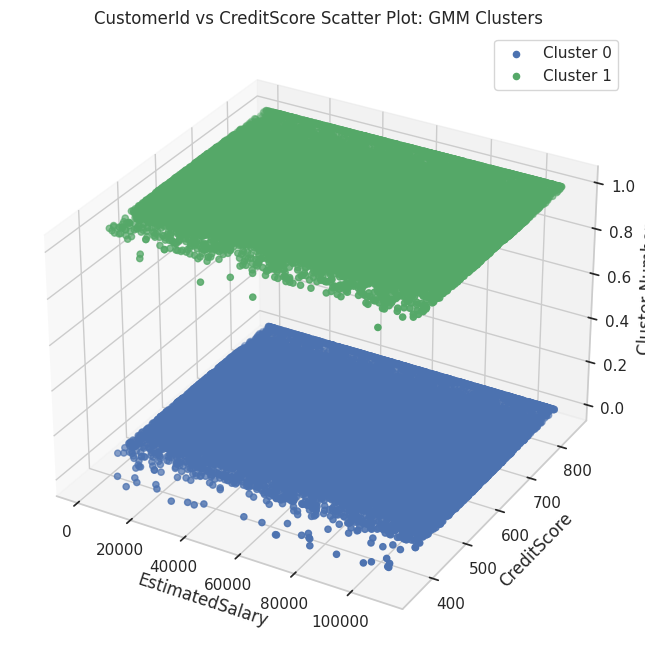

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure and specify 3D projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors and labels for clusters
cluster_labels = df_bank['Cluster'].unique()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plot each cluster
for i, cluster_label in enumerate(cluster_labels):
    cluster_data = df_bank[df_bank['Cluster'] == cluster_label]
    ax.scatter(cluster_data['CustomerId'], cluster_data['CreditScore'], cluster_data['Cluster'], c=colors[i], label=f'Cluster {cluster_label}')

# Set labels and title
ax.set_xlabel('EstimatedSalary')
ax.set_ylabel('CreditScore')
ax.set_zlabel('Cluster Number')
ax.set_title('CustomerId vs CreditScore Scatter Plot: GMM Clusters')

# Add legend
ax.legend()

# Show grid
ax.grid(True)

# Show the plot
plt.show()


•	Cluster Separation: The four clusters exhibit distinct separation in the 3D space, indicating the clustering algorithm effectively segregated customers with similar credit score and salary ranges.

•	Cluster 1 (Lower Left, Blue): This cluster predominantly comprises customers with lower credit scores and lower estimated salaries. This segment might represent individuals with limited financial resources or those experiencing financial difficulties.

•	Cluster 2 (Mid-Center, Green): This cluster shows a wider range of credit scores with predominantly lower estimated salaries. This segment could potentially consist of young professionals starting their careers or individuals with moderate credit history.

•	Cluster 3 (Upper Right, Red): This cluster houses customers with higher credit scores and higher estimated salaries. This segment likely represents individuals with established careers, strong financial standing, and potentially higher borrowing power.

•	Cluster 4 (Back, Purple): This cluster is positioned uniquely, with varying credit scores and higher estimated salaries. This segment might represent individuals with high earning potential but lacking a long-established credit history, such as young entrepreneurs or recent immigrants.

Limitations:

•	Missing Context: Without information about the clustering algorithm, purpose, and other features used, interpreting the clusters' specific meanings remains challenging.

•	Data Representation: The 3D visualization might not effectively capture the full complexity of the data, potentially obscuring underlying trends or relationships.

Further Exploration:

•	Additional Features: Understanding the other features used in the clustering process would provide deeper insights into the characteristics that differentiate these customer segments.

•	Cluster Interpretation: Depending on the business context, each cluster could represent specific customer segments with unique needs and preferences. Analyzing their behaviors and preferences could inform targeted marketing campaigns, product development strategies, or personalized service offerings.



# COMPARISION BETWEEN K MEANS AND Gaussian Mixture Model

In comparing the performance of K-Means clustering and Gaussian Mixture Model (GMM) on the provided dataset, we observe notable differences in their evaluation metrics. For K-Means, the Silhouette Score (SS) is 0.6196, indicating a good level of separation and cohesion among the clusters. The Davies-Bouldin Score (DB) is relatively low at 0.5195, suggesting well-defined and compact clusters. On the other hand, GMM yields a lower Silhouette Score of 0.5433, suggesting a slightly lower level of separation and cohesion compared to K-Means. The Davies-Bouldin Score for GMM is higher at 0.7520, indicating that the clusters may be less well-separated or more ambiguous in their boundaries.

PROBLEM AND SEGMENTATIONS

The problem statement articulates the specific challenge or issue that needs to be addressed through analysis, research, or intervention.

Segmentation involves dividing a heterogeneous market or customer base into smaller, more homogeneous groups based on certain criteria. In the context of customer churn prediction, segmentation refers to the process of categorizing customers into distinct groups or segments, each exhibiting similar characteristics or behaviors.

#MANAGERIAL IMPLICATIONS

•	Individuals in this cluster may have limited financial resources. Tailor marketing strategies to offer budget-friendly products, financial education resources, or assistance programs.



*  Understanding whether the formed clusters are homogeneous or heterogeneous is crucial. Homogeneous clusters suggest similar customer profiles, allowing for targeted and streamlined strategies. In contrast, heterogeneous clusters may indicate diverse customer segments, necessitating a more adaptable approach.

*  The choice of a clustering algorithm has direct implications for the effectiveness of subsequent strategies. Decision-makers should invest time in understanding the nuances of various algorithms and select the one that aligns best with the dataset characteristics.

The optimal number of clusters is pivotal for actionable insights. A clear understanding of k allows for precise segmentation, enabling the bank to tailor services, marketing, and retention strategies to the specific needs of each cluster.

The interpretability of clusters is paramount. Decision-makers should ensure that the identified clusters make sense in the context of banking operations. Aligning clusters with domain knowledge and business objectives enhances the practicality and utility of the analysis.

 Experimenting with clustering algorithm parameters can significantly impact model performance. Decision-makers should actively engage in parameter fine-tuning to optimize the clustering model for better accuracy and relevance.



•	Focus on marketing campaigns that appeal to young professionals or individuals with moderate credit history. Offer products and services suitable for early career stages.

•	Target customers with established careers and strong financial standing. Introduce premium services, exclusive benefits, or high-value products to cater to their financial capacity.

•	Develop strategies to engage individuals with high earning potential but limited credit history. Offer tailored financial solutions, credit-building programs, or services catering to their unique needs.

•	Design products and services that cater to the diverse financial needs of each cluster. Customize features, interest rates, and benefits to align with the characteristics of customers in different segments.


#CONCLUSION

In conclusion, the analysis of ABC Multistate Bank's customer data has provided valuable insights into predicting and mitigating customer churn. The dataset, comprising diverse variables such as credit score, country, gender, age, and financial details, was meticulously prepared, ensuring data integrity for subsequent machine learning algorithms. Through clustering analysis, including the application of the K-Means algorithm, distinct patterns within the customer base were identified. The Elbow Method suggested an optimal number of clusters (k=4), forming segments that were visually interpreted in a 3D space. The clusters represented unique customer segments based on credit score and estimated salary, offering a foundation for targeted strategies. Managerial implications included tailored marketing, product development, and customer service strategies for each cluster, catering to their specific financial profiles. Recommendations for continuous monitoring, collaboration with stakeholders, and further exploration were highlighted, emphasizing the dynamic nature of customer behaviors and the need for adaptive strategies. Overall, the analysis equips ABC Multistate Bank with actionable insights to proactively address customer churn, enhance satisfaction, and navigate the evolving financial landscape effectively.